In [2]:
# David Avallone & Kelly Reynolds Computer Vision

import cv2 
from matplotlib import pyplot as plt
import math
import numpy as np
import os

In [25]:
centroid = (0,0)
# Holds the iris' radius
radius = 0
# Holds the current element of the image used by the getNewEye function
currentEye = 0
# Holds the list of eyes (filenames)
eyesList = []

def getNewEye(list):
	global currentEye
	if (currentEye >= len(list)):
		currentEye = 0
	newEye = list[currentEye]
	currentEye += 1
	return (newEye)

def getCircles(image):
    i = 80
    while i < 151:
        circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=2, minDist=100.0,
                                   param1=30, param2=i, minRadius=100, maxRadius=140)
        if circles is not None and len(circles) == 1:
            return circles[0]
        i += 1
    return []


def getPupil(frame):
    pupilImg = np.zeros_like(frame)
    cv2.inRange(frame, (30,30,30), (80,80,80), pupilImg)
    pupilImg = cv2.cvtColor(pupilImg, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(pupilImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    del pupilImg
    pupilImg = frame.copy()
    for contour in contours:
        moments = cv2.moments(contour)
        area = moments['m00']
        if (area > 50):
            pupilArea = area
            x = moments['m10'] / area
            y = moments['m01'] / area
            pupil = contour
            centroid = (int(x), int(y))
            cv2.drawContours(pupilImg, [pupil], -1, (0, 0, 0), 2)
            break
    return pupilImg


def getIris(frame):
    iris = []
    copyImg = frame.copy()
    resImg = frame.copy()
    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(frame)
    grayImg = cv2.Canny(grayImg, 5, 70)
    grayImg = cv2.GaussianBlur(grayImg, (7, 7), 0)
    circles = getCircles(grayImg)
    iris.append(resImg)
    if circles is not None:
        for circle in circles:
            rad = int(circle[2])
            global centroid
            centroid = (int(circle[0]), int(circle[1]))
            cv2.circle(mask, centroid, rad, (255, 255, 255), -1)
            mask = cv2.bitwise_not(mask)
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)  # Convert mask to single-channel
            cv2.subtract(frame, copyImg, resImg, mask)
            x = int(centroid[0] - rad)
            y = int(centroid[1] - rad)
            w = int(rad * 2)
            h = w
            resImgROI = resImg[y:y+h, x:x+w]
            return resImgROI
    return resImg

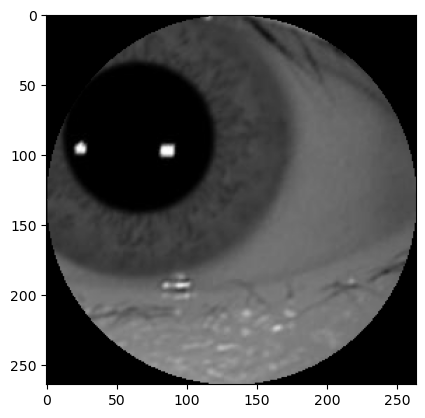

In [26]:
eyesList = os.listdir('archive/000')
eye = getNewEye(eyesList)
frame = cv2.imread("archive/000/"+eye)
plt.imshow(frame)
iris = frame.copy()
output = getPupil(frame)
iris = getIris(output)
#plt.imshow(frame)
plt.imshow(iris)

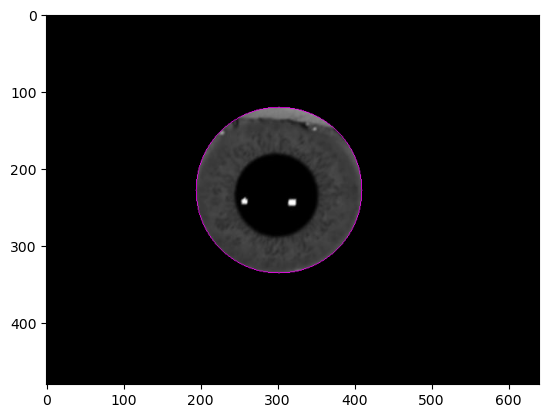

In [11]:
img = cv2.imread("archive/000/S6000S00.jpg", cv2.IMREAD_COLOR) # 0 3 6 7 8 work
  
# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,100, param1 = 50, param2 = 50, minRadius = 10, maxRadius = 115) 
# Draw circles that are detected. 

# This is used to make the background of the image black
mask = np.zeros_like(img) # create empty black image with img size

white_color    = (255, 255, 255)
line_color     = (255,   0, 255) 
filled_circle  = -1
line_thickness = 1

if detected_circles is not None: # found a circle or more than one circle
    detected_circles = np.uint16(np.around(detected_circles))  # <-- turn float to integer
    max_radius_index = np.argmax(detected_circles[0, :, 2])
    a, b, r = detected_circles[0, max_radius_index]
    
    cv2.circle(img, (a, b), r, line_color, line_thickness)
    # draw filled circle in white on black background as mask:
    mask = cv2.circle(mask, (a, b), r, white_color, filled_circle)

    # Apply mask to image
    result = cv2.bitwise_and(img, mask)

    plt.imshow(result)
    plt.show()
else:
    print("Nothing Detected")